# Primer ejemplo para hacer un notebook python
## Empezamos por hacer nuestro shell
Creamos nuestro Shell FCC de 10 capas, distancia interatómica de 2.78 Angstroms y hacemos un radcut de 15 A, y de igual manera lo visualizamos con jmol

In [3]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.core_shell_f as cs
import subprocess as sbp

coords = cs.cubeShell(10,2.78,'fcc')
coords = cs.sphericalShave(coords,15)
name='ejem1.xyz'
cs.tomakeshell_wxyz(coords,'Pt',name)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'ejem1.xyz'], returncode=0)

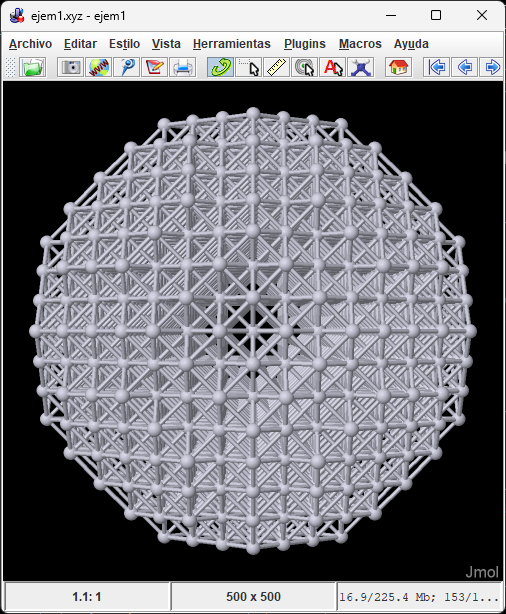

Hacemos el atpos y hacemos un .ini con lammpin
Nota: en caso de ser un .ini monoelemento es necesario cambiar manualmente 2 atom types en name.ini

In [6]:
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
from myfuncions.lammpin_f import wlammpin

wlammpin(atpos,eleList,name)

Copiamos 

In [3]:
#from shutil import copy, move
#os.rename(name[:-4]+'.ini', 'coords.ini')

#print(os.getcwd())


c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\ejemplo\ejemplo


## Dinámica Molecular empieza aquí
Si la proxima linea de comandos se cierra repentinamente es necesario checar el .ini que tenga la cantidad de átomos que debe de ser
El powershell se cierra despues de 10 s

In [3]:

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library.meam Pt Ni ..\\..\\LAMMPS\\PtNiV2.pot Pt Ni 
 
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 2000

 unfix 2
 fix         3 all temp/berendsen 0.0 300.0 0.1
 thermo		100
 run		6000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin 300.0 300.0 0.5 87654
 dump           4 all xyz 100 {name[:-4]}_d.xyz
 run		500
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 10; exit')

0

### A trabajar con el dump
ahora estaremos trabajando con el dump, cambiando etiquetas y mostrandolo de nuevo

In [4]:
import myfuncions.tools_f as tools

dumpatpos, dumpeleList = tools.leer_xyz(f'{name[:-4]}_d.xyz')
dumpatpos, dumpeleList = tools.cambiar_etiquetas_xyz(dumpatpos,dumpeleList,{1: 'Ni', 2: 'Pt'})
tools.wXYZ(dumpatpos,f'{name[:-4]}_d.xyz')

sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', f'{name[:-4]}.xyz'])

Cambia etiquetas a "atpos"


CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'ejem1.xyz'], returncode=0)

## Ahora haremos los gráficos y el análisis 

Grafico de distribuciones

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


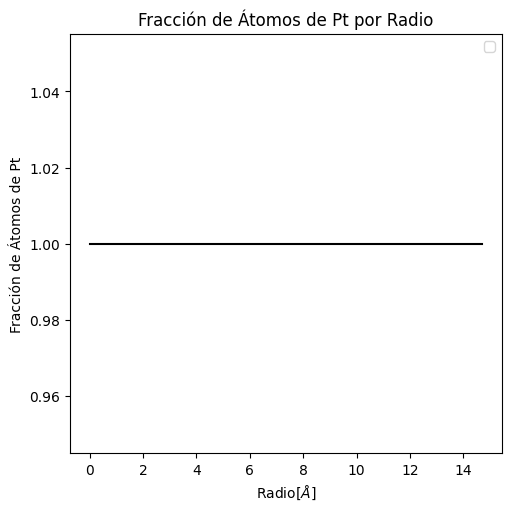

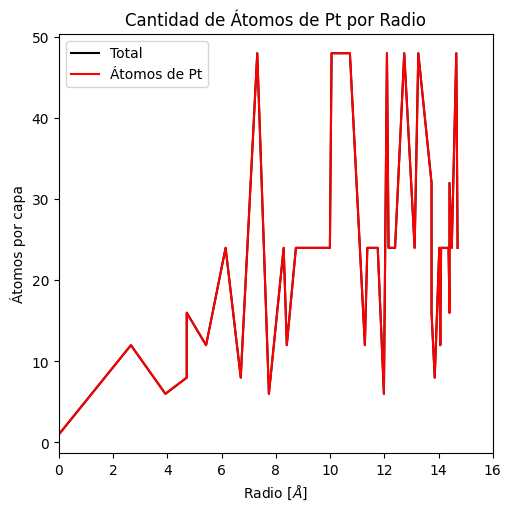

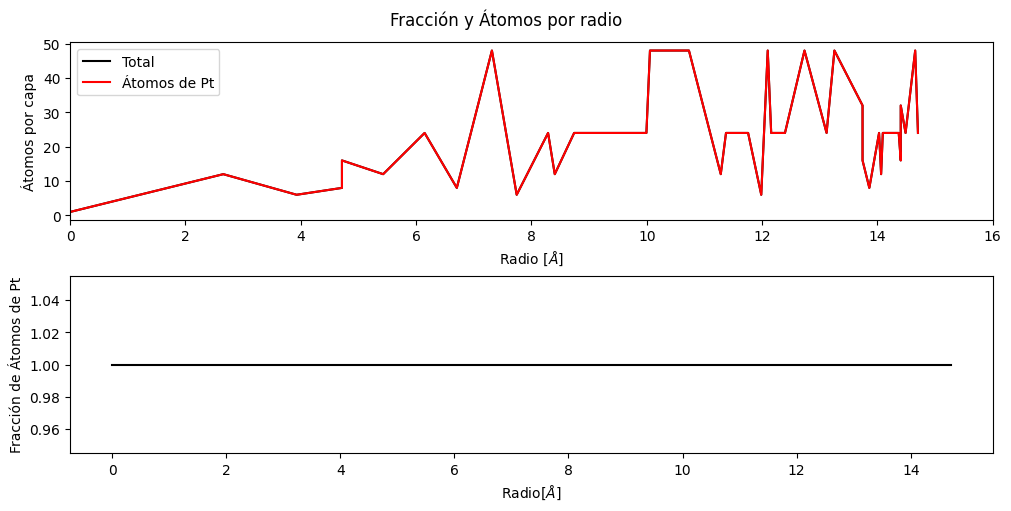

In [2]:
import myfuncions.graphs_f as plt


gatpos, geleList = plt.leer_xyz('ejem1_d.xyz')
plt.graficar_fracc_at_p_rad(gatpos,'Pt')
plt.graficar_at_p_rad(gatpos,'Pt')
plt.plot_fracc_y_at_p_rad(gatpos,'Pt')

## Aquí se hace el PDF y la gráfica
oquettrnr

el proximo código arregla el problema de path

In [1]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

In [2]:
import PDF.runner as pdf
#name = 'ejem1.xyz'
pdf.run_pdf(f'{name[:-4]}.xyz', dir_actual, 1650,0.02)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\ejemplo\ejemplo

           1         960
           1        1919
           1        2878
           1        3837
           3         962
           3        1921
           3        2880
           3        3839
           4         963
           4        1922
           4        2881
           4        3840
           5         964
           5        1923
           5        2882
           5        3841
           6         965
           6        1924
           6        2883
           6        3842
           7         966
           7        1925
           7        2884
           7        3843
           8         967
           8        1926
           8        2885
           8        3844
          10         969
          10        1928
          10        2887
          10        3846
          12         971
          12        1930
          12        2889
          12        3848
          14         973
         

Hacemos la gráfica PDF

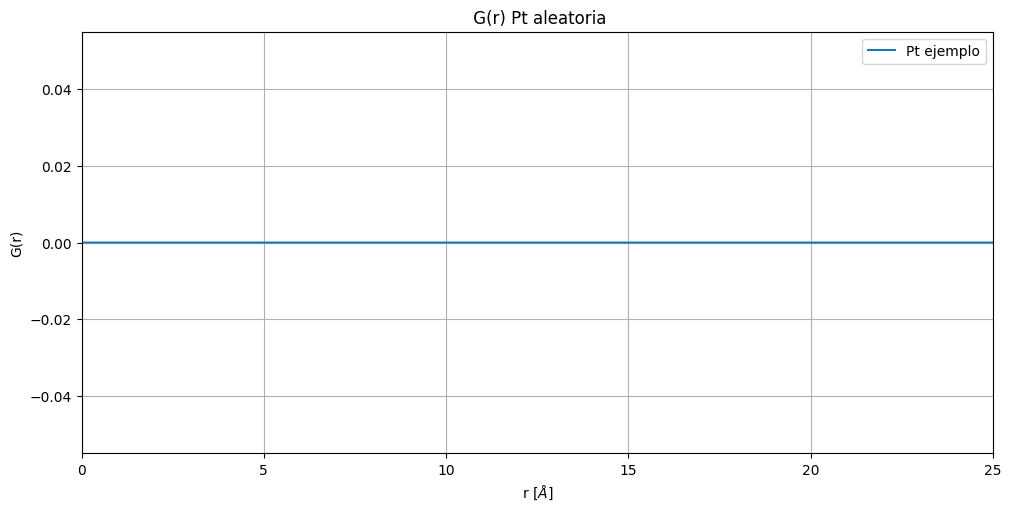

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df_FCC= pd.read_csv('ejem1.txt', sep='\s+')


fig, ax =plt.subplots(figsize=(10,5), layout='constrained')
ax.plot(df_FCC['#r(A)'], df_FCC['G(r)'], label='Pt ejemplo')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,25])
ax.set_ylabel('G(r)')
ax.set_title(' G(r) Pt aleatoria')
ax.grid('True', linestyle='-')
ax.legend()
plt.show()